In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def get_option_price(date, stock_price, strike, dividend, DTE):
  """
  Calculates the price of a call option.

  Args:
    date: Date #mm/dd/yyyy
    stock_price: Current stock price.
    strike: Strike price.
    dividend: Dividend yield: yearly yield divided by stock_price
    DTE: Days to expiration.

  Returns:
    The price of the call option.
  """

  # Load data from CSV file
  df = pd.read_csv('dataq.csv')
  # Find the row corresponding to the given date
  row = df[df['Date'] == date]

  if row.empty:
    return "Date not found in the dataset."

  # Extract one year volatility and one year interest rate
  # Source: https://www.macrotrends.net

  sigma = row['Sigma'].values[0]
  r = row['rate'].values[0]

  # Calculate d1 and d2 (Black-Scholes formula)
  d1 = (np.log(stock_price / strike) + (r - dividend + 0.5 * sigma ** 2) * DTE / 365) / (sigma * np.sqrt(DTE / 365))
  d2 = d1 - sigma * np.sqrt(DTE / 365)

  # Calculate call option price
  call_price = stock_price * np.exp(-dividend * DTE / 365) * norm.cdf(d1) - strike * np.exp(-r * DTE / 365) * norm.cdf(d2)

  return call_price



In [ ]:
date = '6/21/2024'
stock_price = 480
strike = 190
dividend = 0.0063
DTE = 365

price = ("%.2f" % get_option_price(date, stock_price, strike, dividend, DTE))
print(f"Call option price: {price}")

Call option price: 476.99


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2008-01-02   51.270000   51.470001   50.130001   50.410000   43.763378   
2008-01-03   50.410000   50.759998   50.150002   50.619999   43.945702   
2008-01-04   49.810001   49.830002   48.209999   48.400002   42.018406   
2008-01-07   48.400002   48.599998   47.430000   48.169998   41.818718   
2008-01-08   48.270000   48.759998   46.919998   46.919998   40.733528   
...                ...         ...         ...         ...         ...   
2024-06-12  471.989990  476.500000  471.290009  474.149994  473.397552   
2024-06-13  477.720001  478.390015  474.420013  476.720001  475.963501   
2024-06-14  476.519989  479.260010  476.049988  479.190002  478.429565   
2024-06-17  479.459991  486.859985  478.140015  485.059998  484.290253   
2024-06-18  485.010010  485.899994  483.429993  485.209991  484.440002   

               Volume  Dividends  Sto

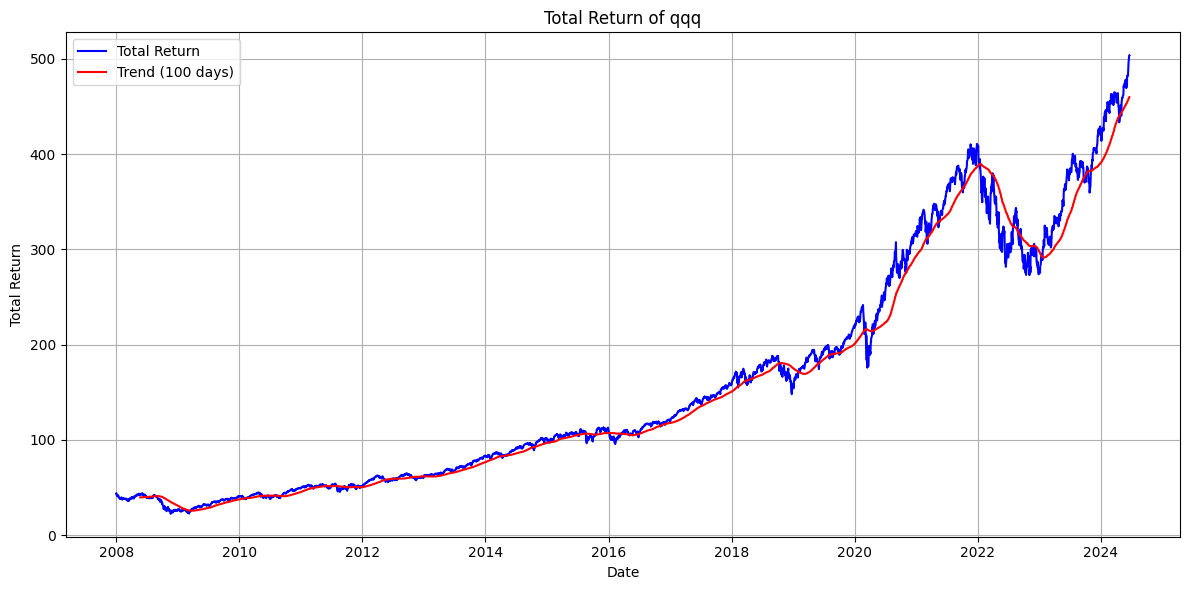

In [ ]:
#Stock return

import yfinance as yf
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    # Download stock data including dividends
    stock = yf.download(ticker, start=start_date, end=end_date, progress=False, actions=True)

    # Calculate total return including dividends
    stock['Total Return'] = stock['Adj Close'] + stock['Dividends'].cumsum()

    return stock

# Example usage
ticker = 'qqq'  # Replace with your stock ticker
start_date = '2008-01-01'
end_date = '2024-06-20'

# Get stock data
stock_data = get_stock_data(ticker, start_date, end_date)

# Print the data (or process as needed)
print(stock_data)
#print(stock_data[stock_data['Dividends'] > 0])

# Plotting total return with trend line
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Total Return'], label='Total Return', color='blue')
plt.plot(stock_data.index, stock_data['Total Return'].rolling(window=100).mean(), label='Trend (100 days)', color='red')
plt.title(f'Total Return of {ticker}')
plt.xlabel('Date')
plt.ylabel('Total Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#!pip install yahoo_fin

In [ ]:
#Options collector
from yahoo_fin import options

def get_option_chain(ticker):
    # Fetch option chain data
    option_chain = options.get_options_chain(ticker)

    # Print the option chain
    print(f"Option chain for {ticker}:")
    print(option_chain)

# Example usage
ticker = 'SPY'  # Replace with your stock ticker
get_option_chain(ticker)


Option chain for SPY:
{'calls':          Contract Name Last Trade Date (EDT)  Strike  Last Price    Bid  \
0   SPY240701C00490000     6/24/2024 5:52 PM     490       54.59  54.78   
1   SPY240701C00510000     6/28/2024 1:41 PM     510       39.67  34.88   
2   SPY240701C00520000     6/28/2024 4:52 PM     520       26.19  24.80   
3   SPY240701C00530000     6/28/2024 7:40 PM     530       15.31  14.80   
4   SPY240701C00531000     6/28/2024 4:14 PM     531       15.79  13.83   
5   SPY240701C00532000     6/28/2024 7:52 PM     532       13.14  12.82   
6   SPY240701C00533000     6/28/2024 7:44 PM     533       11.32  11.88   
7   SPY240701C00534000     6/28/2024 8:13 PM     534       11.20  10.82   
8   SPY240701C00535000     6/28/2024 8:13 PM     535       10.25  10.06   
9   SPY240701C00536000     6/28/2024 7:47 PM     536        9.40   9.07   
10  SPY240701C00537000     6/28/2024 8:08 PM     537        8.03   8.09   
11  SPY240701C00538000     6/28/2024 8:02 PM     538        6.77   7

In [ ]:
from logging import disable
#Getting dividend data
from datetime import datetime, timedelta

def first_friday_after(date):
    days_to_friday = (4 - date.weekday() + 7) % 7
    if days_to_friday == 0:
        days_to_friday = 7
    next_friday = date + pd.Timedelta(days=days_to_friday)
    return next_friday

ticker = 'qqq'
start_date = '2008-01-01'
end_date = '2024-06-20'
div=get_stock_data(ticker, start_date, end_date)
div=(div[div['Dividends'] > 0])

# Create a new DataFrame with the required columns
div = div.reset_index()
cols = ['Date', 'Dividends']
divsellcall = div.loc[:, cols]
divsellcall['frdyaftrdiv']=div['Date'].apply(first_friday_after)
print(divsellcall['frdyaftrdiv'].iloc[1])
start_date=divsellcall['frdyaftrdiv'].iloc[1]
end_date=divsellcall['Date'].iloc[-1]
# We just added the friday after the dividend, now we need to add exactly one
# month after the dividned, then two months after teh dividned, etc
# Generate one-month increment dates for each dividend date
all_dates = pd.DataFrame(columns=['Date'])
for date in divsellcall['Date']:
    increment_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
    increment_dates_df = pd.DataFrame({'Date': increment_dates})
    all_dates = pd.concat([all_dates, increment_dates_df], ignore_index=True)

# Remove duplicate dates
all_dates = all_dates.drop_duplicates().reset_index(drop=True)

# Merge the new dates with the existing dividend data
divsellcall = pd.merge(all_dates, divsellcall, on='Date', how='left')
#Now we add the QQQ or SPY open price plus sigma and interest rate
df = pd.read_csv('dataq.csv')
df['Date'] = pd.to_datetime(df['Date'])
divsellcall = pd.merge(divsellcall, df, on='Date', how='left')

print(divsellcall)


2008-06-27 00:00:00
          Date  Dividends frdyaftrdiv      Sigma  rate
0   2008-07-01        NaN         NaT  23.650000  2.38
1   2008-08-01        NaN         NaT  22.570000  2.25
2   2008-09-01        NaN         NaT        NaN   NaN
3   2008-10-01        NaN         NaT  39.810001  1.72
4   2008-11-01        NaN         NaT        NaN   NaN
..         ...        ...         ...        ...   ...
184 2023-11-01        NaN         NaT  16.870001  5.37
185 2023-12-01        NaN         NaT  12.630000  5.05
186 2024-01-01        NaN         NaT        NaN   NaN
187 2024-02-01        NaN         NaT  13.880000  4.68
188 2024-03-01        NaN         NaT  13.110000  4.94

[189 rows x 5 columns]


In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

def get_stock_data(ticker, start_date, end_date):
    # Download stock data including dividends
    stock = yf.download(ticker, start=start_date, end=end_date, progress=False, actions=True)
    return stock

def first_friday_after(date):
    days_to_friday = (4 - date.weekday() + 7) % 7
    if days_to_friday == 0:
        days_to_friday = 7
    next_friday = date + pd.Timedelta(days=days_to_friday)
    return next_friday

# Getting dividend data
ticker = 'QQQ'
start_date = '2008-01-01'
end_date = '2024-06-20'
div = get_stock_data(ticker, start_date, end_date)
div = div[div['Dividends'] > 0]

# Create a new DataFrame with the required columns
div = div.reset_index()
cols = ['Date', 'Dividends']
divsellcall = div.loc[:, cols]
# Calculate the first Friday after each dividend date
divsellcall['frdyaftrdiv'] = divsellcall['Date'].apply(first_friday_after)

# Convert end_date to datetime object
end_date = pd.to_datetime(end_date)

# Generate one-month increment dates starting from the first Friday after each dividend
all_dates = pd.DataFrame(columns=['Date'])
for idx, row in divsellcall.iterrows():
    current_date = row['frdyaftrdiv']
    while current_date <= end_date:
        all_dates = pd.concat([all_dates, pd.DataFrame({'Date': [current_date]})], ignore_index=True)
        # Move to the next month
        current_date += pd.DateOffset(months=1)
        # Find the next first Friday after the current date
        current_date = first_friday_after(current_date)

# Remove duplicate dates
all_dates = all_dates.drop_duplicates().reset_index(drop=True)

# Merge the new dates with the existing dividend data
divsellcall = pd.merge(all_dates, divsellcall, on='Date', how='left')

# Load additional data
df = pd.read_csv('dataq.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Merge with the additional dataset
final_df = pd.merge(divsellcall, df, on='Date', how='left')

print(final_df)


          Date  Dividends frdyaftrdiv  Sigma  rate
0   2008-03-21        NaN         NaT    NaN   NaN
1   2008-04-25        NaN         NaT  19.59  1.97
2   2008-05-30        NaN         NaT  17.83  2.22
3   2008-07-04        NaN         NaT    NaN   NaN
4   2008-08-08        NaN         NaT  20.66  2.19
..         ...        ...         ...    ...   ...
813 2024-01-19        NaN         NaT  13.30  4.84
814 2024-02-23        NaN         NaT  13.75  5.00
815 2024-03-29        NaN         NaT    NaN   NaN
816 2024-05-03        NaN         NaT  13.49  5.12
817 2024-06-07        NaN         NaT  12.22  5.17

[818 rows x 5 columns]


In [ ]:
#Clean data
final_df = final_df.dropna()

print(final_df)

          Date  Dividends frdyaftrdiv      Sigma    rate
13  2009-06-19      0.044  2009-06-26  27.990000  0.5100
26  2010-09-17      0.112  2010-09-24  22.010000  0.2600
39  2011-12-16      0.161  2011-12-23  24.290001  0.1100
47  2012-09-21      0.200  2012-09-28  13.980000  0.1800
52  2013-03-15      0.159  2013-03-22  11.300000  0.1400
60  2013-12-20      0.272  2013-12-27  13.790000  0.1300
73  2015-03-20      0.248  2015-03-27  13.020000  0.2400
86  2016-06-17      0.287  2016-06-24  19.410000  0.5100
175 2008-12-19      0.043  2008-12-26  44.930000  0.4400
188 2010-03-19      0.051  2010-03-26  16.969999  0.4200
201 2011-06-17      0.121  2011-06-24  21.850000  0.1700
222 2013-06-21      0.224  2013-06-28  18.900000  0.1300
235 2014-09-19      0.238  2014-09-26  12.110000  0.1100
248 2015-12-18      0.342  2015-12-25  20.700001  0.6700
261 2017-03-17      0.274  2017-03-24  11.280000  0.9801
342 2009-03-20      0.049  2009-03-27  45.889999  0.6000
355 2010-06-18      0.089  2010